In [30]:
import numpy as np #import numpy
import matplotlib.pyplot as plt #for plotting things
import scipy.interpolate as interp #for data interpolation

1)There is a period before the event in which samples are taken to determine the noise level of the detector. Take the range from sample 0 to sample 15000 and apply a gaussian smoothing to that data. You should write your own function to do this, although it can be based on the example given in class. You should use two different values for the standard deviation: 1.1 (as used in class) and 50. In both cases, provide the mean (the noise level) and the standard deviation of the resulting data.

Text(0,0.5,'data')

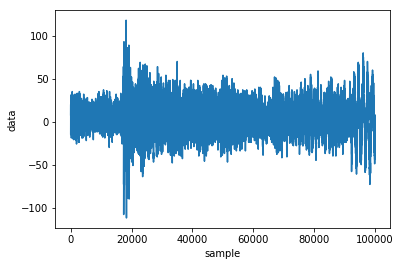

In [31]:
sample,data=np.loadtxt('assignment6_picoData.txt',unpack=True,skiprows=1,delimiter=',') #load data
plt.plot(sample,data) #plot data
plt.xlabel('sample') #x-axis
plt.ylabel('data') #y-axis

For a sigma of 1.1 the noise level is 5.677785350534313 with a standard deviation of 5.182392868557799 .
For a sigma of 50 the noise level is 5.65446589154258 with a standard deviation of 2.4576502446664947 .
While the noise levels are close to each other the standard deviation of the smoothing with a smaller sigma is noticably bigger.
A higher standard deviation in the Gaussian window leads to a extremer smoothing, the smoothed values are closer to each other so their standard deviation is smaller.


Text(0,0.5,'data')

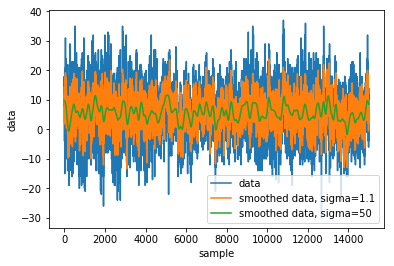

In [32]:
sample,data=sample[:15001],data[:15001] #shorten data to desired length

def gausssmooth(x,y,sigma): #define a function
    y_new=[] #create a new list for storing
    for i in range(len(x)): #loop through the indices
        kernel=np.exp(-(x-x[i])**2/(2*sigma**2)) #calculate the scaling
        kernel=kernel/np.sum(kernel) #normalisation
        y_new.append(np.sum(y*kernel))
    return y_new #at the end return the filled array
    
data_sm1=gausssmooth(sample,data,1.1) #smoothing 1
data_sm2=gausssmooth(sample,data,50) #smoothing 2

mean1,sigma1=np.median(data_sm1),np.std(data_sm1) #calculate mean and standard deviation
mean2,sigma2=np.median(data_sm2),np.std(data_sm2) #calculate mean and standard deviation

print('For a sigma of 1.1 the noise level is',mean1,'with a standard deviation of',sigma1,'.') #answer
print('For a sigma of 50 the noise level is',mean2,'with a standard deviation of',sigma2,'.') #answer
print('While the noise levels are close to each other the standard deviation of the smoothing with a smaller sigma is noticably bigger.') #answer
print('A higher standard deviation in the Gaussian window leads to a extremer smoothing, the smoothed values are closer to each other so their standard deviation is smaller.') #answer

plt.plot(sample,data,label='data') #plot original data
plt.plot(sample,data_sm1,label='smoothed data, sigma=1.1') #plot smoothed data
plt.plot(sample,data_sm2,label='smoothed data, sigma=50') #plot smoothed data
plt.legend() #legend
plt.xlabel('sample') #x-axis
plt.ylabel('data') #y-axis

2)The event actually starts somewhere after the  at "pre-noise" period. We will define the start of the event to be when the level of the signal from the microphone has a magnitude of 60 or more (which can also be negative). In order to determine this point, use the data saved as assignment6_trigData.txt, which is a section of the data provided earlier. Do a linear interpolation between those points and determine when the signal has an absolute value between 60 and 61. You should take special care with the interpolation at the data points themselves.

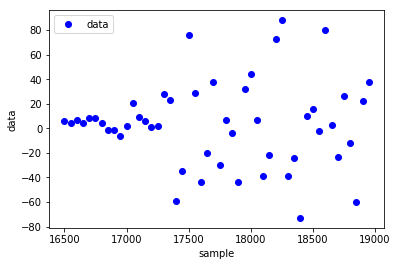

In [33]:
x_data,y_data=np.loadtxt('assignment6_trigData.txt',unpack=True,skiprows=1,delimiter=',') #read data
plt.plot(x_data,y_data,'bo',label='data') #plot data
plt.xlabel('sample') #x-axis
plt.ylabel('data') #y-axis
plt.legend() #legend

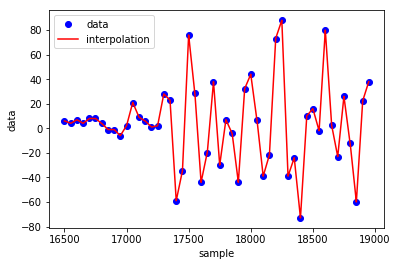

In [34]:
def lin_interp(x_data,y_data,x_interp): #define a function
    slopes=[] #create an empty list for the slopes between the data points
    y_interp=[] #create an empty array for the interpolated data on the x_point values
    for i in range(len(x_data)-1): #loop through the indices for the x-data, execept for the last value
        slopes.append((y_data[i+1]-y_data[i])/(x_data[i+1]-x_data[i])) #calculate the slope at this step and add to list
        for point in x_interp: #loop through all test points where a interpolated value is needed
            if x_data[i]<=point<=x_data[i+1]: #if the point is between the two observed x values
                y_interp.append(y_data[i]+(point-x_data[i])*slopes[i]) #calculate the y value using the slope and save it
    return(y_interp) #at the end, return the list with the interpolated data

x_interp=np.arange(x_data[0],x_data[len(x_data)-1],(x_data[len(x_data)-1]-x_data[0])/len(x_data)*0.001) #ceates x values for interpolation with denser steps
y_interp=lin_interp(x_data,y_data,x_interp) #use function to calculate y values
plt.plot(x_data,y_data,'bo',label='data') #plot original data
plt.plot(x_interp,y_interp,'r',label='interpolation') #plot interpolation
plt.xlabel('sample') #x-axis
plt.ylabel('data') #y-axis
plt.legend() #legend

In [35]:
x_intervall=[] #create empty space
y_intervall=[] #create space for y-values
i=0 #set starting index to 0
start=60
end=61
while i<len(y_interp): #continue until the indices reaches the last index
    if start<=abs(y_interp[i])<=end and (not start<=abs(y_interp[i-1])<=end or not start<=abs(y_interp[i+1])<=end): #check if value correlating to the index is between 60 and 61 and whether the following and the previous value are not
        x_intervall.append(x_interp[i]) #save
        y_intervall.append(y_interp[i]) #save
        i=i+1 #count index up
    else: #value is not in the desired range or not worth saving because it is no end point
        i=i+1 #count index up

for i in range(0,len(x_intervall),2): #loop over indices in steps of 2
     print('The function has values between',start,'and',end,'for',x_intervall[i],'<=x<=',x_intervall[i+1],'. Those points have the y-values:f(',x_intervall[i],')=',y_intervall[i],'and f(',x_intervall[i+1],')=',y_intervall[i+1],'.') #uneven numbers are starting values, even numbers are end values.
        
print('The number of intervalls with absolute values between 60 and 61 as well as the accuracy of their starting and end value depends highly on the density of the interpolation x-values. The denser the points on the x-axis the better is the determination of the intervalls.') #answer

The function has values between 60 and 61 for 17492.83799998113 <=x<= 17493.229999981122 . Those points have the y-values:f( 17492.83799998113 )= 60.10035995810759 and f( 17493.229999981122 )= 60.97059995809106 .
The function has values between 60 and 61 for 17515.96599998069 <=x<= 17516.99499998067 . Those points have the y-values:f( 17515.96599998069 )= 60.99196001815144 and f( 17516.99499998067 )= 60.024700018169824 .
The function has values between 60 and 61 for 18193.194999967818 <=x<= 18193.63599996781 . Those points have the y-values:f( 18193.194999967818 )= 60.07049993885448 and f( 18193.63599996781 )= 60.908399938838556 .
The function has values between 60 and 61 for 18260.667999966536 <=x<= 18261.01099996653 . Those points have the y-values:f( 18260.667999966536 )= 60.90328008499928 and f( 18261.01099996653 )= 60.032060085015836 .
The function has values between 60 and 61 for 18386.74499996414 <=x<= 18387.72499996412 . Those points have the y-values:f( 18386.74499996414 )= -6

3)Use the same data points as the previous question to do a Lagrange interpolation (using a function which you write) and find the points where the absolute value of the signal is between 60 and 61.

(-100, 100)

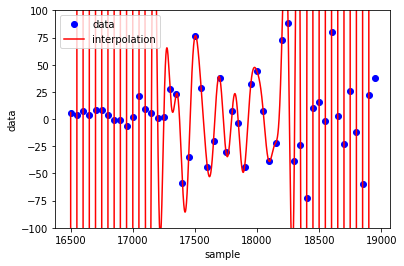

In [36]:
def Lag_interp(x_data,y_data,x_interp): #define a function
    def L(xi): #define a function that returns a list of L(x)s
        L=[] #create an empty list to store stuff
        for j in range(len(x_data)): #loop through the indices of x-data
            x_data_short=np.delete(x_data,j) #deletes the element with index j that would give a division by zero in the next step
            L.append(np.prod((xi-x_data_short)/(x_data[j]-x_data_short))) #calculates Lk(x) as a product
        return L #returns L
    Lag_values=[] #create empty list to store y-values for x_interp-points
    for x in x_interp: #loops through the x-values for interpolation
        Lag_values.append(sum(y_data*L(x))) #calculates the interpolated value and stores it
    return Lag_values #returns the interpolated data

x_interp=np.arange(x_data[0],x_data[len(x_data)-1],(x_data[len(x_data)-1]-x_data[0])/len(x_data)*0.001) #ceates x values for interpolation with denser steps
y_interp_Lag=Lag_interp(x_data,y_data,x_interp) #use function to calculate y values
plt.plot(x_data,y_data,'bo',label='data') #plot original data
plt.plot(x_interp,y_interp_Lag,'r',label='interpolation') #plot interpolation
plt.xlabel('sample') #x-axis
plt.ylabel('data') #y-axis
plt.legend() #legend
plt.ylim(-100,100) #limit y-axis

In [37]:
x_intervall_Lag=[] #create empty space
y_intervall_Lag=[] #create empty space
i=0 #set starting index to 0
start=60
end=61
while i<len(y_interp_Lag): #continue until the indices reaches the last index
    if start<=abs(y_interp_Lag[i])<=end and (not start<=abs(y_interp_Lag[i-1])<=end or not start<=abs(y_interp_Lag[i+1])<=end): #check if value correlating to the index is between 60 and 61 and previous and following values
        x_intervall_Lag.append(x_interp[i]) #save
        y_intervall_Lag.append(y_interp_Lag[i]) #save
        i=i+1 #count index up
    else: #value is not in the desired range or worth saving
        i=i+1 #count index up

for i in range(0,len(x_intervall_Lag),2): #loop over indices in steps of 2
     print('The function has values between',start,'and',end,'for',x_intervall_Lag[i],'<=x<=',x_intervall_Lag[i+1],'. Those points have the y-values:f(',x_intervall_Lag[i],')=',y_intervall_Lag[i],'and f(',x_intervall_Lag[i+1],')=',y_intervall_Lag[i+1],'.') #uneven numbers are starting values, even numbers are end values.
             
print('Again, the number of intervalls with absolute values between 60 and 61 as well as the accuracy of their starting and end value depends highly on the density of the interpolation x-values.') #answer
print('A lot of the fluctuations around the beginning and the end were there should be a intervall where the function has absolute values between 60 and 61 are not covered with the chosen step size, by increasing the number of x-values those would be caputured as well but I chose to stick with the same step size as fot the linear interpolation to allow direct comparison.') #answer
print('But it is obvious that while the Lagrangian interpolation might work well in the middle it has big problems describing the function at the edges which is because it relies in the interpolation on the surrounding data which gets difficult at the edges so it starts to oscillate very weirdly.') #answer

The function has values between 60 and 61 for 17099.122999988613 <=x<= 17101.229999988573 . Those points have the y-values:f( 17099.122999988613 )= 60.50542217294305 and f( 17101.229999988573 )= -60.20191727166764 .
The function has values between 60 and 61 for 17147.1429999877 <=x<= 17152.581999987597 . Those points have the y-values:f( 17147.1429999877 )= -60.43127001585834 and f( 17152.581999987597 )= 60.49420282036057 .
The function has values between 60 and 61 for 17194.280999986804 <=x<= 17194.329999986803 . Those points have the y-values:f( 17194.280999986804 )= 60.54967873550168 and f( 17194.329999986803 )= 60.015305095809325 .
The function has values between 60 and 61 for 17207.314999986556 <=x<= 17207.412999986554 . Those points have the y-values:f( 17207.314999986556 )= -60.322704907028935 and f( 17207.412999986554 )= -60.99181815033101 .
The function has values between 60 and 61 for 17237.743999985978 <=x<= 17237.890999985975 . Those points have the y-values:f( 17237.743999

4)Finally, use scipy's cubic spline interpolation (as shown in class) with the same data points to find the same values. Which method do you think is more trustworthy?

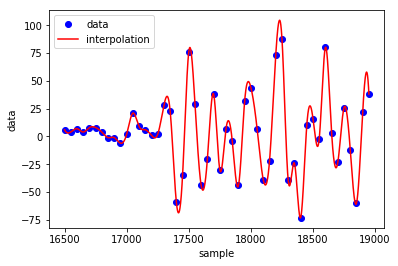

In [38]:
x_interp=np.arange(x_data[0],x_data[len(x_data)-1],(x_data[len(x_data)-1]-x_data[0])/len(x_data)*0.001) #ceates x values for interpolation with denser steps
y_interp_CubSpl=interp.CubicSpline(x_data,y_data)(x_interp) #use scipy spline interpolation, apply to the x-values and generate y-interpolation
plt.plot(x_data,y_data,'bo',label='data') #plot original data
plt.plot(x_interp,y_interp_CubSpl,'r',label='interpolation') #plot interpolation
plt.xlabel('sample') #x-axis
plt.ylabel('data') #y-axis
plt.legend() #legend

In [39]:
x_intervall_CubSpl=[] #create empty space
y_intervall_CubSpl=[] #create empty space
i=0 #set starting index to 0
start=60
end=61
while i<len(y_interp_CubSpl): #continue until the indices reaches the last index
    if start<=abs(y_interp_CubSpl[i])<=end and (not start<=abs(y_interp_CubSpl[i-1])<=end or not start<=abs(y_interp_CubSpl[i+1])<=end): #check if value correlating to the index is between 60 and 61 and the following and previous value
        x_intervall_CubSpl.append(x_interp[i]) #save
        y_intervall_CubSpl.append(y_interp_CubSpl[i]) #save
        i=i+1 #count index up
    else: #value is not in the desired range or worth saving
        i=i+1 #count index up

for i in range(0,len(x_intervall_CubSpl),2): #loop over indices in steps of 2
    print('The function has values between',start,'and',end,'for',x_intervall_CubSpl[i],'<=x<=',x_intervall_CubSpl[i+1],'. Those points have the y-values:f(',x_intervall_CubSpl[i],')=',y_intervall_CubSpl[i],'and f(',x_intervall_CubSpl[i+1],')=',y_intervall_CubSpl[i+1],'.') #uneven numbers are starting values, even numbers are end values.
           
print('The accuracy of the determination of the intervalls with absolute values between 60 and 61 depends highly on the density of the interpolation x-values.') #answer

The function has values between 60 and 61 for 17400.962999982876 <=x<= 17401.893999982858 . Those points have the y-values:f( 17400.962999982876 )= -60.027675786806704 and f( 17401.893999982858 )= -60.96607222923932 .
The function has values between 60 and 61 for 17433.008999982267 <=x<= 17433.93999998225 . Those points have the y-values:f( 17433.008999982267 )= -60.957948199381846 and f( 17433.93999998225 )= -60.013221076541456 .
The function has values between 60 and 61 for 17488.966999981203 <=x<= 17489.456999981194 . Those points have the y-values:f( 17488.966999981203 )= 60.0125087310232 and f( 17489.456999981194 )= 60.943721580636755 .
The function has values between 60 and 61 for 17531.645999980392 <=x<= 17532.23399998038 . Those points have the y-values:f( 17531.645999980392 )= 60.95512368061855 and f( 17532.23399998038 )= 60.07170745182622 .
The function has values between 60 and 61 for 18193.04799996782 <=x<= 18193.53799996781 . Those points have the y-values:f( 18193.0479999

In [40]:
#answer
print('The linear interpolation has the advantage of being quite easy to program, apply and understand. It gives a fair approximation of the function everywhere in the examined x-intervall and finds most of the intervalls where the function has a certain value. But this is very dependend on the chosen step size and overall the function has quite sharp edges which probably don´t describe the actual behaviour.')
print('The Lagrangian interpolation offers a smoother function and works especially well in the middle of the examined x-intervall. Problems occur at the edges of the given intervall where the function osciallates very windly and creates additional intervalls where the interpolated function is between 60 and 61 that aren´t really there. This is the method I would chose least to either describe the function as a whole or get the x-intervalls where the function value is over 60.')
print('The probably most accurate describtion is achieved by using scipy´s cubic spline interpolation. The function is smooth everywhere and not artificial oscialltions are created. I would trust this function most to describe the given data and get the desired x-values. It is also very easy to apply, the only disadvantage I can think of is that one is using a fixed package so there is less controll over what the function is doing by the programmer. But since the documentation for is accessible online one can learn exactly what the function is doing.')
print('So I would choose the cubic spline interpolation to evaluate this data!')

The linear interpolation has the advantage of being quite easy to program, apply and understand. It gives a fair approximation of the function everywhere in the examined x-intervall and finds most of the intervalls where the function has a certain value. But this is very dependend on the chosen step size and overall the function has quite sharp edges which probably don´t describe the actual behaviour.
The Lagrangian interpolation offers a smoother function and works especially well in the middle of the examined x-intervall. Problems occur at the edges of the given intervall where the function osciallates very windly and creates additional intervalls where the interpolated function is between 60 and 61 that aren´t really there. This is the method I would chose least to either describe the function as a whole or get the x-intervalls where the function value is over 60.
The probably most accurate describtion is achieved by using scipy´s cubic spline interpolation. The function is smooth e